In [3]:
import pandas as pd

combatsData = pd.read_csv('input/pokemon.csv')

In [4]:
combatsData.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
combatsData.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [6]:
combatsData.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [7]:
combatsData.shape

(800, 12)

In [8]:
combatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [9]:
print(combatsData['Attack'].value_counts(dropna =False))

Attack
100    40
65     39
80     37
50     37
60     33
       ..
128     1
36      1
22      1
54      1
121     1
Name: count, Length: 111, dtype: int64


In [10]:
combatsData.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<Axes: title={'center': 'HP'}, xlabel='Legendary'>

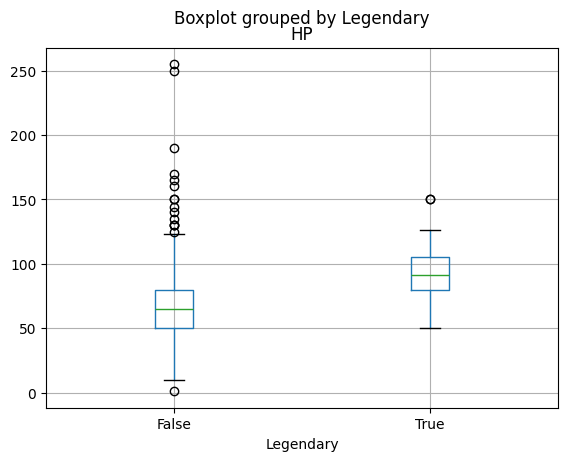

In [11]:
combatsData.boxplot(column='HP',by = 'Legendary')

In [12]:
data_new = combatsData.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [13]:
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['HP','Speed'])
melted

,Name,variable,value
0,Bulbasaur,HP,45
1,Ivysaur,HP,60
2,Venusaur,HP,80
3,Mega Venusaur,HP,80
4,Charmander,HP,39
5,Bulbasaur,Speed,45
6,Ivysaur,Speed,60
7,Venusaur,Speed,80
8,Mega Venusaur,Speed,80
9,Charmander,Speed,65


In [14]:
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,HP,Speed
Name,,
Bulbasaur,45,45
Charmander,39,65
Ivysaur,60,60
Mega Venusaur,80,80
Venusaur,80,80


In [15]:
data1 = combatsData.head()
data2= combatsData.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True)
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [16]:
data1 = combatsData['HP'].head()
data2= combatsData['Speed'].head()
conc_data_col = pd.concat([data1,data2],axis =1)
conc_data_col

,HP,Speed
0,45,45
1,60,60
2,80,80
3,80,80
4,39,65


In [17]:
combatsData.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [18]:
combatsData['Type 1'] = combatsData['Type 1'].astype('category')
combatsData['Speed'] = combatsData['Speed'].astype('float')
combatsData.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

In [19]:
combatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [20]:
combatsData["Type 2"].value_counts(dropna =False)

Type 2
NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

In [21]:
combatsData["Type 2"].dropna(inplace = True)

In [22]:
combatsData["Type 2"] = combatsData["Type 2"].fillna("empty")

In [23]:
assert  combatsData['Type 2'].notnull().all()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

combatsData = pd.read_csv('input/pokemon.csv')

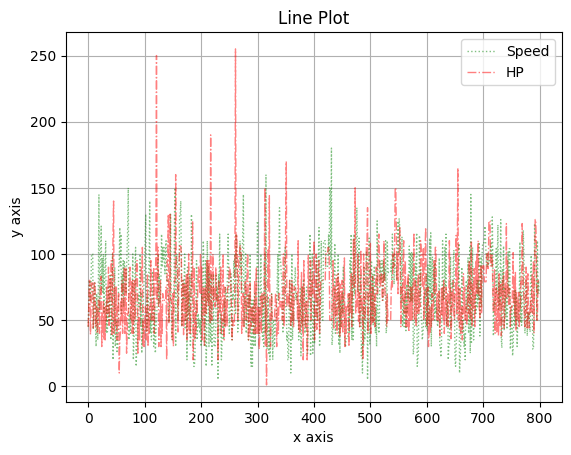

In [25]:
combatsData.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
combatsData.HP.plot(color = 'r',label = 'HP',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

Text(0.5, 1.0, 'HP Speed Scatter Plot')

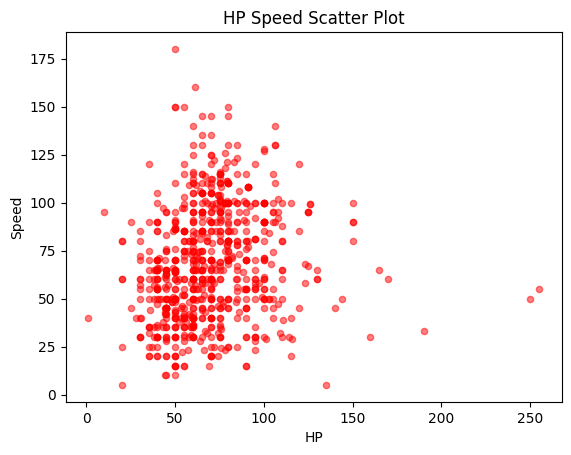

In [27]:
combatsData.plot(kind='scatter', x='HP', y='Speed',alpha = 0.5,color = 'red')
plt.xlabel('HP')
plt.ylabel('Speed')
plt.title('HP Speed Scatter Plot')

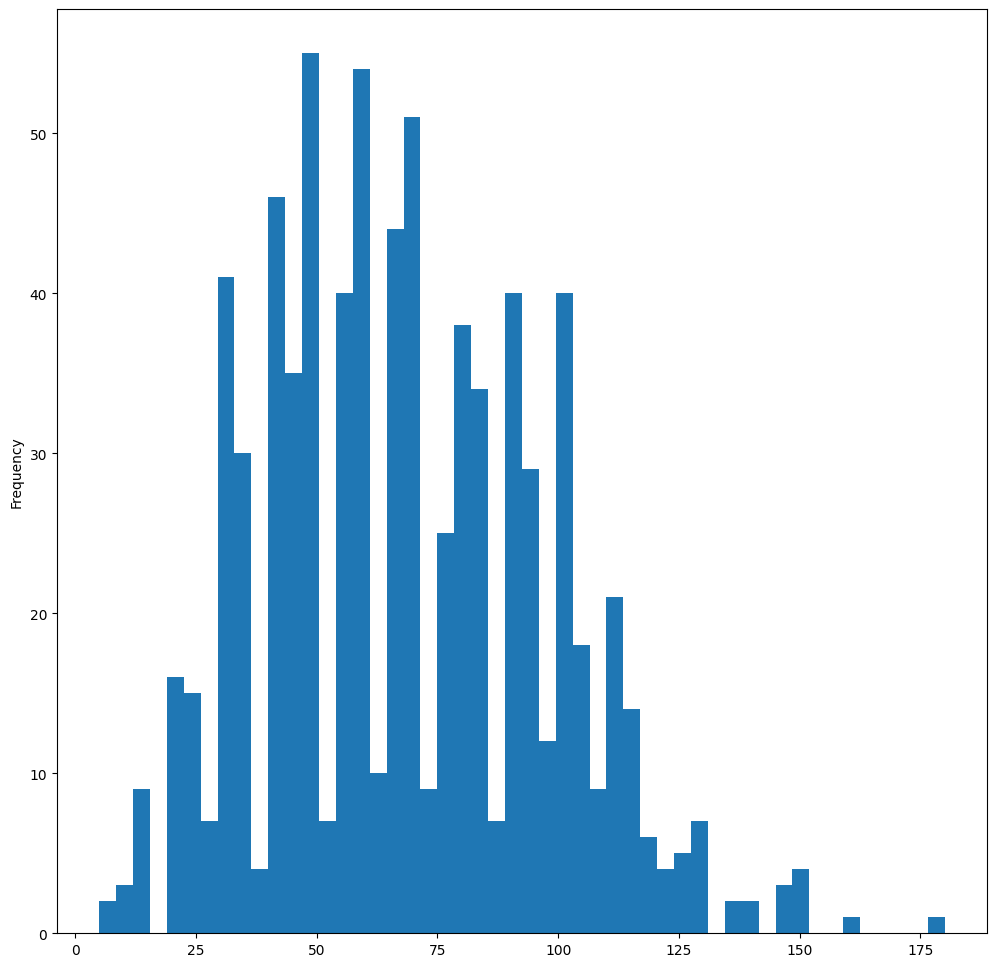

In [28]:
combatsData.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [29]:
combatsData.Speed.plot(kind = 'hist',bins = 50)
plt.clf()

<Figure size 640x480 with 0 Axes>